# The Adaptive Learning Challenge

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Carregando Dataset_model

In [2]:
df_model = pd.read_csv('Dataset_model.csv')

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3106: DtypeWarning: Columns (9,10,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df_model.head()

,novo_user_id,city,country,device,device_type,os,platform,region,gp:carrers,gp:college type,...,institute_id,knowledge_area_id,modality_id,nullified,outdated,product_id,publication_year,right_answer,scholarity_id,novo_question_id
0,1,Rio de Janeiro,Brazil,Apple iPhone,Apple iPhone 11 Pro Max,ios 15.4.1,iOS,Rio de Janeiro,"Tribunal, Administrativa",NaN,...,4126.0,13.0,1.0,0.0,0.0,1.0,2022.0,A,2.0,489400
1,1,Rio de Janeiro,Brazil,Apple iPhone,Apple iPhone 11 Pro Max,ios 15.4.1,iOS,Rio de Janeiro,"Tribunal, Administrativa",NaN,...,4126.0,13.0,1.0,0.0,0.0,1.0,2022.0,C,2.0,489399
2,1,Rio de Janeiro,Brazil,Apple iPhone,Apple iPhone 11 Pro Max,ios 15.4.1,iOS,Rio de Janeiro,"Tribunal, Administrativa",NaN,...,4126.0,13.0,1.0,0.0,0.0,1.0,2022.0,D,2.0,489398
3,1,Rio de Janeiro,Brazil,Apple iPhone,Apple iPhone 11 Pro Max,ios 15.4.1,iOS,Rio de Janeiro,"Tribunal, Administrativa",NaN,...,4126.0,13.0,1.0,0.0,0.0,1.0,2022.0,A,2.0,489397
4,1,Rio de Janeiro,Brazil,Apple iPhone,Apple iPhone 11 Pro Max,ios 15.4.1,iOS,Rio de Janeiro,"Tribunal, Administrativa",NaN,...,4126.0,13.0,1.0,0.0,0.0,1.0,2022.0,E,2.0,489396


In [4]:
df_model.shape

(2000000, 32)

In [5]:
df = df_model.copy()

In [6]:
df.shape

(2000000, 32)

## EDA

### Visualizando tipos de features

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 32 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   novo_user_id            int64  
 1   city                    object 
 2   country                 object 
 3   device                  object 
 4   device_type             object 
 5   os                      object 
 6   platform                object 
 7   region                  object 
 8   gp:carrers              object 
 9   gp:college type         object 
 10  gp:degree course        object 
 11  gp:previous experience  object 
 12  gp:school type          object 
 13  gp:segment              object 
 14  gp:source_project       object 
 15  acertou                 int64  
 16  created_at              object 
 17  row                     int64  
 18  commented_by_professor  float64
 19  difficulty              float64
 20  discipline_id           float64
 21  examining_board_id      float64

In [8]:
df.sample(10)

,novo_user_id,city,country,device,device_type,os,platform,region,gp:carrers,gp:college type,...,institute_id,knowledge_area_id,modality_id,nullified,outdated,product_id,publication_year,right_answer,scholarity_id,novo_question_id
1813325,18134,Mossoro,Brazil,Windows,Windows,Chrome 103,Web,Rio Grande do Norte,Policial,NaN,...,5788.0,53.0,1.0,0.0,0.0,1.0,2017.0,C,3.0,220977
1231593,12316,Fortaleza,Brazil,Linux,Linux,Firefox 103,Web,Ceara,"Tribunal, Administrativa, Outras",NaN,...,8183.0,13.0,1.0,0.0,0.0,1.0,2018.0,D,3.0,271076
1640374,16404,NaN,Brazil,Apple iPhone,Apple iPhone 7,ios 15.5,iOS,Pernambuco,Policial,NaN,...,5783.0,9.0,1.0,0.0,0.0,5.0,2021.0,D,2.0,471284
827309,8274,Rio de Janeiro,Brazil,Windows,Windows,Chrome 103,Web,Rio de Janeiro,"Fiscal, Bancária, Controle e Gestão, Administr...",NaN,...,19.0,7.0,1.0,0.0,0.0,1.0,2010.0,B,2.0,66184
1265801,12659,Macapá,Brazil,Windows,Windows,Edge 103,Web,Amapa,"Legislativa, Administrativa",NaN,...,8019.0,9.0,1.0,0.0,0.0,1.0,2018.0,E,1.0,336069
81007,811,Fernandopolis,Brazil,Apple iPhone,Apple iPhone XS Max,ios 15.2,iOS,Sao Paulo,Jurídica,NaN,...,123.0,14.0,1.0,0.0,0.0,1.0,2017.0,A,2.0,225621
752145,7522,Rio de Janeiro,Brazil,Windows,Windows,Chrome 104,Web,Rio de Janeiro,Tribunal,NaN,...,5692.0,9.0,1.0,0.0,0.0,1.0,2018.0,C,3.0,244689
1842303,18424,Fortaleza,Brazil,Samsung Phone,Samsung Galaxy A20s,Chrome 103,Web,Ceara,Policial,NaN,...,4786.0,9.0,1.0,0.0,0.0,1.0,2019.0,D,3.0,306165
1140155,11402,Juazeiro do Norte,Brazil,Samsung Galaxy Phone,Samsung Galaxy A71,Chrome 103,Web,Ceara,Tribunal,NaN,...,122.0,9.0,1.0,0.0,0.0,1.0,2018.0,A,3.0,266814
1103468,11035,Mario Campos,Brazil,Motorola Phone,Motorola moto g(8) play,android 10,Android,Minas Gerais,NaN,NaN,...,36.0,9.0,2.0,0.0,0.0,1.0,2004.0,C,3.0,105051


In [9]:
df.describe()

,novo_user_id,acertou,row,commented_by_professor,difficulty,discipline_id,examining_board_id,institute_id,knowledge_area_id,modality_id,nullified,outdated,product_id,publication_year,scholarity_id,novo_question_id
count,2.000000e+06,2.000000e+06,2.000000e+06,1.999822e+06,1.997371e+06,1.999822e+06,1.999818e+06,1.999818e+06,1.999822e+06,1.999822e+06,1.999822e+06,1.999822e+06,1.999822e+06,1.999813e+06,1.999822e+06,2.000000e+06
mean,1.000050e+04,6.542805e-01,5.050000e+01,5.536108e-01,2.000066e+00,7.162386e+01,1.818057e+02,4.531887e+03,1.587639e+01,1.247017e+00,2.577229e-03,1.783759e-02,1.381521e+00,2.016652e+03,2.636847e+00,2.671826e+05
std,5.773504e+03,4.756024e-01,2.886608e+01,4.971177e-01,8.548664e-01,1.370548e+02,3.342118e+02,2.904510e+03,3.041109e+01,4.312768e-01,5.070097e-02,1.323609e-01,1.304370e+00,3.789063e+00,5.234967e-01,1.354817e+05
min,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+03,1.000000e+00,1.000000e+00
25%,5.000750e+03,0.000000e+00,2.575000e+01,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,8.350000e+02,9.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.015000e+03,2.000000e+00,1.645358e+05
50%,1.000050e+04,1.000000e+00,5.050000e+01,1.000000e+00,2.000000e+00,9.000000e+00,6.300000e+01,5.782000e+03,9.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.018000e+03,3.000000e+00,2.709695e+05
75%,1.500025e+04,1.000000e+00,7.525000e+01,1.000000e+00,3.000000e+00,5.300000e+01,2.070000e+02,6.259000e+03,1.400000e+01,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.019000e+03,3.000000e+00,3.717530e+05
max,2.000000e+04,1.000000e+00,1.000000e+02,1.000000e+00,5.000000e+00,5.930000e+02,3.851000e+03,1.027800e+04,3.250000e+02,2.000000e+00,1.000000e+00,1.000000e+00,9.000000e+00,2.022000e+03,3.000000e+00,5.006940e+05


In [10]:
df.isnull().sum()

novo_user_id                    0
city                       142400
country                     13200
device                      71600
device_type                163200
os                          13200
platform                    13200
region                      13700
gp:carrers                 116900
gp:college type           1997500
gp:degree course          1997500
gp:previous experience    1052200
gp:school type            1997500
gp:segment                  35200
gp:source_project           38000
acertou                         0
created_at                      0
row                             0
commented_by_professor        178
difficulty                   2629
discipline_id                 178
examining_board_id            182
institute_id                  182
knowledge_area_id             178
modality_id                   178
nullified                     178
outdated                      178
product_id                    178
publication_year              187
right_answer  

In [11]:
print("Valores únicos de cada feature objeto:")
for coluna in df:
    if df[coluna].dtypes != object:
        continue
    print(f"{coluna}: {df[coluna].nunique()} - Tipo: {df[coluna].dtypes}")

Valores únicos de cada feature objeto:
city: 1799 - Tipo: object
country: 18 - Tipo: object
device: 217 - Tipo: object
device_type: 394 - Tipo: object
os: 231 - Tipo: object
platform: 3 - Tipo: object
region: 50 - Tipo: object
gp:carrers: 1451 - Tipo: object
gp:college type: 2 - Tipo: object
gp:degree course: 16 - Tipo: object
gp:previous experience: 4 - Tipo: object
gp:school type: 6 - Tipo: object
gp:segment: 4 - Tipo: object
gp:source_project: 2 - Tipo: object
created_at: 1956537 - Tipo: object
right_answer: 8 - Tipo: object


In [12]:
# Não precisamos da coluna created_at
df = df.drop(columns = {'created_at'})
df.head()

,novo_user_id,city,country,device,device_type,os,platform,region,gp:carrers,gp:college type,...,institute_id,knowledge_area_id,modality_id,nullified,outdated,product_id,publication_year,right_answer,scholarity_id,novo_question_id
0,1,Rio de Janeiro,Brazil,Apple iPhone,Apple iPhone 11 Pro Max,ios 15.4.1,iOS,Rio de Janeiro,"Tribunal, Administrativa",NaN,...,4126.0,13.0,1.0,0.0,0.0,1.0,2022.0,A,2.0,489400
1,1,Rio de Janeiro,Brazil,Apple iPhone,Apple iPhone 11 Pro Max,ios 15.4.1,iOS,Rio de Janeiro,"Tribunal, Administrativa",NaN,...,4126.0,13.0,1.0,0.0,0.0,1.0,2022.0,C,2.0,489399
2,1,Rio de Janeiro,Brazil,Apple iPhone,Apple iPhone 11 Pro Max,ios 15.4.1,iOS,Rio de Janeiro,"Tribunal, Administrativa",NaN,...,4126.0,13.0,1.0,0.0,0.0,1.0,2022.0,D,2.0,489398
3,1,Rio de Janeiro,Brazil,Apple iPhone,Apple iPhone 11 Pro Max,ios 15.4.1,iOS,Rio de Janeiro,"Tribunal, Administrativa",NaN,...,4126.0,13.0,1.0,0.0,0.0,1.0,2022.0,A,2.0,489397
4,1,Rio de Janeiro,Brazil,Apple iPhone,Apple iPhone 11 Pro Max,ios 15.4.1,iOS,Rio de Janeiro,"Tribunal, Administrativa",NaN,...,4126.0,13.0,1.0,0.0,0.0,1.0,2022.0,E,2.0,489396


## Label Encoding de features

In [13]:
for colunaobjeto in df:
    if df[colunaobjeto].dtypes != object:
        continue
    else:
        df[colunaobjeto] = df[colunaobjeto].astype('category').cat.codes

## Normalizando dados em uma cópia do dataframe

In [14]:
df = df.dropna()

In [15]:
df.isnull().sum()

novo_user_id              0
city                      0
country                   0
device                    0
device_type               0
os                        0
platform                  0
region                    0
gp:carrers                0
gp:college type           0
gp:degree course          0
gp:previous experience    0
gp:school type            0
gp:segment                0
gp:source_project         0
acertou                   0
row                       0
commented_by_professor    0
difficulty                0
discipline_id             0
examining_board_id        0
institute_id              0
knowledge_area_id         0
modality_id               0
nullified                 0
outdated                  0
product_id                0
publication_year          0
right_answer              0
scholarity_id             0
novo_question_id          0
dtype: int64

In [16]:
df.head()

,novo_user_id,city,country,device,device_type,os,platform,region,gp:carrers,gp:college type,...,institute_id,knowledge_area_id,modality_id,nullified,outdated,product_id,publication_year,right_answer,scholarity_id,novo_question_id
0,1,1378,4,47,18,227,2,39,1147,-1,...,4126.0,13.0,1.0,0.0,0.0,1.0,2022.0,2,2.0,489400
1,1,1378,4,47,18,227,2,39,1147,-1,...,4126.0,13.0,1.0,0.0,0.0,1.0,2022.0,4,2.0,489399
2,1,1378,4,47,18,227,2,39,1147,-1,...,4126.0,13.0,1.0,0.0,0.0,1.0,2022.0,5,2.0,489398
3,1,1378,4,47,18,227,2,39,1147,-1,...,4126.0,13.0,1.0,0.0,0.0,1.0,2022.0,2,2.0,489397
4,1,1378,4,47,18,227,2,39,1147,-1,...,4126.0,13.0,1.0,0.0,0.0,1.0,2022.0,6,2.0,489396


In [17]:
df.shape

(1997362, 31)

## Normalização de valores, exceto <i>acertou</i>

In [18]:
from sklearn.preprocessing import MinMaxScaler

df_scaled = df.copy()

for coluna in df_scaled:
    if coluna == ['acertou']:
        continue
    df_scaled[coluna] = MinMaxScaler().fit_transform(np.array(df_scaled[coluna]).reshape(-1,1))
  
display(df_scaled)

,novo_user_id,city,country,device,device_type,os,platform,region,gp:carrers,gp:college type,...,institute_id,knowledge_area_id,modality_id,nullified,outdated,product_id,publication_year,right_answer,scholarity_id,novo_question_id
0,0.0,0.766537,0.277778,0.221198,0.048223,0.987013,1.0,0.80,0.791178,0.0,...,0.401382,0.037037,0.0,0.0,0.0,0.0,1.000000,0.285714,0.5,0.977558
1,0.0,0.766537,0.277778,0.221198,0.048223,0.987013,1.0,0.80,0.791178,0.0,...,0.401382,0.037037,0.0,0.0,0.0,0.0,1.000000,0.571429,0.5,0.977556
2,0.0,0.766537,0.277778,0.221198,0.048223,0.987013,1.0,0.80,0.791178,0.0,...,0.401382,0.037037,0.0,0.0,0.0,0.0,1.000000,0.714286,0.5,0.977554
3,0.0,0.766537,0.277778,0.221198,0.048223,0.987013,1.0,0.80,0.791178,0.0,...,0.401382,0.037037,0.0,0.0,0.0,0.0,1.000000,0.285714,0.5,0.977552
4,0.0,0.766537,0.277778,0.221198,0.048223,0.987013,1.0,0.80,0.791178,0.0,...,0.401382,0.037037,0.0,0.0,0.0,0.0,1.000000,0.857143,0.5,0.977550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,1.0,0.000000,0.277778,0.221198,0.043147,0.995671,1.0,0.88,0.765679,0.0,...,0.671402,0.080247,0.0,0.0,0.0,0.0,0.863636,0.285714,1.0,0.865910
1999996,1.0,0.000000,0.277778,0.221198,0.043147,0.995671,1.0,0.88,0.765679,0.0,...,0.671402,0.080247,0.0,0.0,0.0,0.0,0.863636,0.285714,1.0,0.864114
1999997,1.0,0.000000,0.277778,0.221198,0.043147,0.995671,1.0,0.88,0.765679,0.0,...,0.671402,0.080247,0.0,0.0,0.0,0.0,0.863636,0.428571,1.0,0.864112
1999998,1.0,0.000000,0.277778,0.221198,0.043147,0.995671,1.0,0.88,0.765679,0.0,...,0.318089,0.080247,0.0,0.0,0.0,0.0,0.863636,0.428571,1.0,0.860775


## Plottando correlações entre features

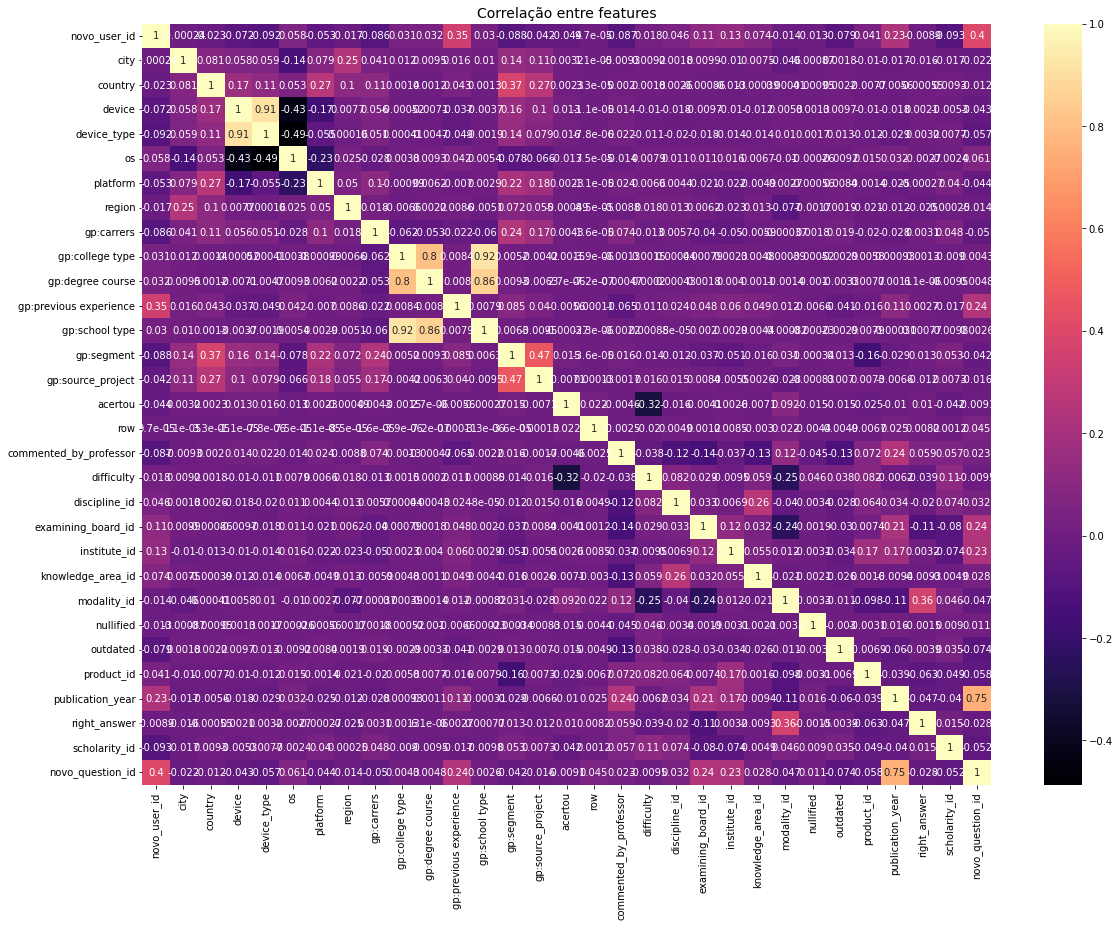

In [19]:
plt.figure(figsize=(19,14))
sns.heatmap(df_scaled.corr(),annot=True,cmap='magma')
plt.title('Correlação entre features',fontsize=14)
plt.yticks(rotation =0)
plt.show()

## Correlação entre features em ordem descendente usando Pearson e Spearman

<AxesSubplot:>

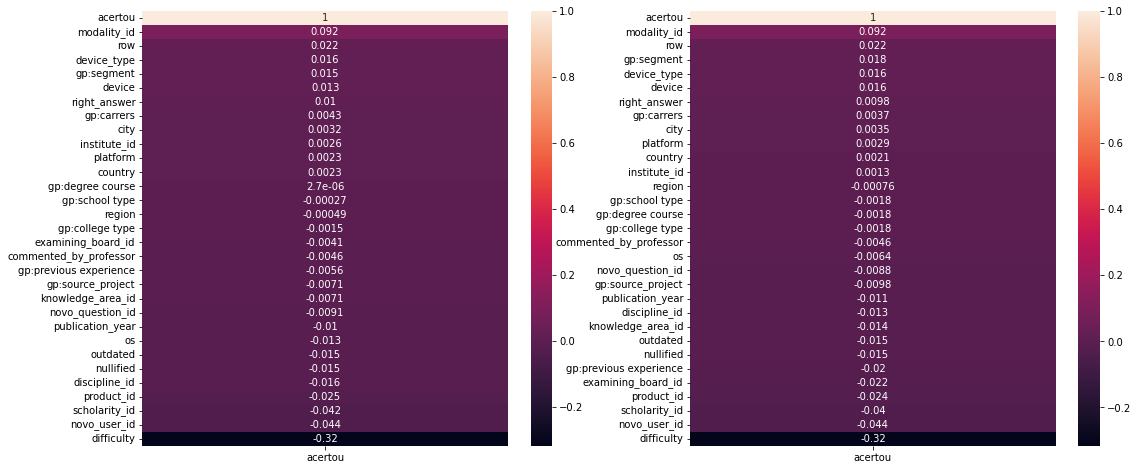

In [20]:
fig, ax = plt.subplots(1,2, figsize=(18, 8))

corrPearson = df_scaled.corr('pearson')[['acertou']].sort_values(by='acertou', ascending=False)
corrSpearman = df_scaled.corr('spearman')[['acertou']].sort_values(by='acertou', ascending=False)

sns.heatmap(corrPearson, ax=ax[0], annot=True)
sns.heatmap(corrSpearman, ax=ax[1], annot=True)

### Agora sabemos as features que tem maior correlação com a feature y(acertou), vamos dropar colunas desnecessárias e criar o X com as que vamos usar no modelo.

In [21]:
df_novo = df_scaled.drop(columns = {'gp:college type',
                                    'gp:school type',
                                    'gp:degree course',
                                    'novo_question_id',
                                    'gp:previous experience',
                                    'novo_user_id',
                                    'city',
                                    'country',
                                    'platform',
                                    'gp:carrers',
                                    'institute_id',})

In [22]:
display(df_novo)

,device,device_type,os,region,gp:segment,gp:source_project,acertou,row,commented_by_professor,difficulty,discipline_id,examining_board_id,knowledge_area_id,modality_id,nullified,outdated,product_id,publication_year,right_answer,scholarity_id
0,0.221198,0.048223,0.987013,0.80,0.5,0.5,0.0,0.000000,0.0,0.75,0.400338,0.019098,0.037037,0.0,0.0,0.0,0.0,1.000000,0.285714,0.5
1,0.221198,0.048223,0.987013,0.80,0.5,0.5,0.0,0.010101,0.0,0.75,0.400338,0.019098,0.037037,0.0,0.0,0.0,0.0,1.000000,0.571429,0.5
2,0.221198,0.048223,0.987013,0.80,0.5,0.5,1.0,0.020202,0.0,0.50,0.400338,0.019098,0.037037,0.0,0.0,0.0,0.0,1.000000,0.714286,0.5
3,0.221198,0.048223,0.987013,0.80,0.5,0.5,0.0,0.030303,0.0,0.75,0.400338,0.019098,0.037037,0.0,0.0,0.0,0.0,1.000000,0.285714,0.5
4,0.221198,0.048223,0.987013,0.80,0.5,0.5,1.0,0.040404,0.0,0.50,0.400338,0.019098,0.037037,0.0,0.0,0.0,0.0,1.000000,0.857143,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,0.221198,0.043147,0.995671,0.88,0.5,1.0,1.0,0.959596,0.0,0.25,0.310811,0.137666,0.080247,0.0,0.0,0.0,0.0,0.863636,0.285714,1.0
1999996,0.221198,0.043147,0.995671,0.88,0.5,1.0,1.0,0.969697,0.0,0.00,0.310811,0.137666,0.080247,0.0,0.0,0.0,0.0,0.863636,0.285714,1.0
1999997,0.221198,0.043147,0.995671,0.88,0.5,1.0,0.0,0.979798,0.0,0.25,0.310811,0.137666,0.080247,0.0,0.0,0.0,0.0,0.863636,0.428571,1.0
1999998,0.221198,0.043147,0.995671,0.88,0.5,1.0,0.0,0.989899,0.0,0.50,0.310811,0.055968,0.080247,0.0,0.0,0.0,0.0,0.863636,0.428571,1.0


In [23]:
df_novo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1997362 entries, 0 to 1999999
Data columns (total 20 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   device                  float64
 1   device_type             float64
 2   os                      float64
 3   region                  float64
 4   gp:segment              float64
 5   gp:source_project       float64
 6   acertou                 float64
 7   row                     float64
 8   commented_by_professor  float64
 9   difficulty              float64
 10  discipline_id           float64
 11  examining_board_id      float64
 12  knowledge_area_id       float64
 13  modality_id             float64
 14  nullified               float64
 15  outdated                float64
 16  product_id              float64
 17  publication_year        float64
 18  right_answer            float64
 19  scholarity_id           float64
dtypes: float64(20)
memory usage: 320.0 MB


In [24]:
df_novo.shape

(1997362, 20)

In [25]:
X = df_novo[[
'device',
'device_type',
'os',
'region',
'gp:segment',
'gp:source_project',
'row',
'commented_by_professor',
'difficulty',
'discipline_id',
'knowledge_area_id',
'modality_id',
'outdated',
'product_id',
'nullified',
'examining_board_id',
'publication_year',
'right_answer',
'scholarity_id'
]].values

y = df_novo[['acertou']].values

In [26]:
X

array([[0.22119816, 0.04822335, 0.98701299, ..., 1.        , 0.28571429,
        0.5       ],
       [0.22119816, 0.04822335, 0.98701299, ..., 1.        , 0.57142857,
        0.5       ],
       [0.22119816, 0.04822335, 0.98701299, ..., 1.        , 0.71428571,
        0.5       ],
       ...,
       [0.22119816, 0.04314721, 0.995671  , ..., 0.86363636, 0.42857143,
        1.        ],
       [0.22119816, 0.04314721, 0.995671  , ..., 0.86363636, 0.42857143,
        1.        ],
       [0.22119816, 0.04314721, 0.995671  , ..., 0.86363636, 0.71428571,
        1.        ]])

In [27]:
y

array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

# Logistic Regression

In [28]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.594933
         Iterations 5
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.077       
Dependent Variable: y                AIC:              2376630.9653
Date:               2022-10-10 08:10 BIC:              2376868.6047
No. Observations:   1997362          Log-Likelihood:   -1.1883e+06 
Df Model:           18               LL-Null:          -1.2878e+06 
Df Residuals:       1997343          LLR p-value:      0.0000      
Converged:          1.0000           Scale:            1.0000      
No. Iterations:     5.0000                                         
---------------------------------------------------------------------
           Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
---------------------------------------------------------------------
x1         0.1930     0.0138     13.9800   0.0000    0.1660    0.2201
x2         0.0275     0.0111     

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=19)

In [30]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [31]:
y_pred = logreg.predict(X_test)
print('Acurácia em %: {:.2f}'.format(logreg.score(X_test, y_test)))

Acurácia em %: 0.68


In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 84103 123059]
 [ 67296 324751]]


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.56      0.41      0.47    207162
         1.0       0.73      0.83      0.77    392047

    accuracy                           0.68    599209
   macro avg       0.64      0.62      0.62    599209
weighted avg       0.67      0.68      0.67    599209



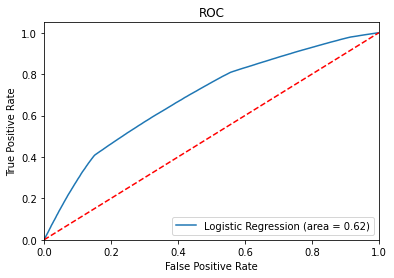

In [34]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

## Decision Tree

In [35]:
from sklearn import tree
arvore = tree.DecisionTreeClassifier()

In [36]:
arvore = arvore.fit(X_train, y_train)

In [37]:
arvore.score(X_train, y_train)

0.9993884789432916

In [38]:
# Acurácia Decision Tree
y_pred_tree = arvore.predict(X_test)
print('Acurácia em %: {:.2f}'.format(arvore.score(X_test, y_test)))

print(classification_report(y_test, y_pred_tree))

Acurácia em %: 0.58
              precision    recall  f1-score   support

         0.0       0.40      0.42      0.41    207162
         1.0       0.69      0.67      0.68    392047

    accuracy                           0.58    599209
   macro avg       0.54      0.55      0.55    599209
weighted avg       0.59      0.58      0.59    599209



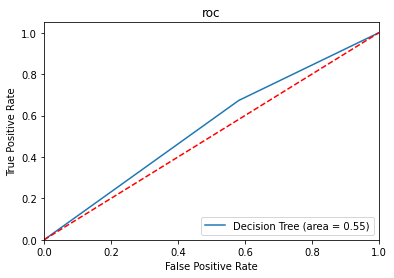

In [39]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, arvore.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, arvore.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('roc')
plt.legend(loc="lower right")
plt.show()

## Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
  
y_pred = gnb.predict(X_test)
  
from sklearn import metrics
print("Acurácia em %:", metrics.accuracy_score(y_test, y_pred)*100)

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurácia em %: 65.78439242401232


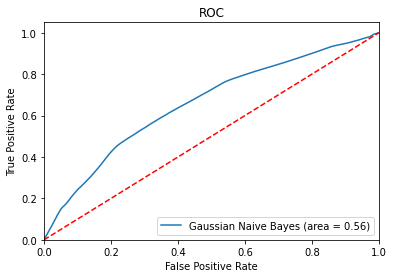

In [41]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, gnb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gnb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gaussian Naive Bayes (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

### Maior Acurácia/F-1 Score é a da Logistic Regression, vamos usar ele para gerar as previsões.

## Carregando dataset Submit.csv

In [42]:
df_submit_new = pd.read_csv('Submit.csv', sep=";")

In [43]:
df_submit_new.head()

,novo_user_id,city,country,device,device_type,os,platform,region,gp:carrers,gp:college type,...,institute_id,knowledge_area_id,modality_id,nullified,outdated,product_id,publication_year,right_answer,scholarity_id,novo_question_id
0,1,Rio de Janeiro,Brazil,Apple iPhone,Apple iPhone 11 Pro Max,ios 15.4.1,iOS,Rio de Janeiro,"Tribunal, Administrativa",NaN,...,6289.0,13.0,1.0,0.0,0.0,1.0,2021.0,B,3.0,484766
1,2,São Paulo,Brazil,Windows,Windows,Chrome 104,Web,Sao Paulo,Tribunal,NaN,...,2994.0,53.0,1.0,0.0,0.0,1.0,2016.0,C,3.0,159545
2,3,NaN,Brazil,Apple iPhone,Apple iPhone 11,ios 15.5,iOS,Minas Gerais,"Controle e Gestão, Outras, Administrativa",NaN,...,20.0,14.0,1.0,0.0,0.0,1.0,2017.0,C,3.0,233145
3,4,Recife,Brazil,Windows,Windows,Chrome 104,Web,Pernambuco,"Fiscal, Tribunal, Policial, Legislativa, Jurídica",NaN,...,36.0,9.0,2.0,0.0,0.0,1.0,2014.0,C,3.0,108082
4,5,Brasília,Brazil,Windows,Windows,Chrome 99,Web,Federal District,Bancária,NaN,...,6001.0,13.0,1.0,0.0,0.0,1.0,2015.0,A,3.0,151695


In [44]:
df_submit_new.shape

(20000, 32)

In [45]:
df_submit = df_submit_new.copy()

In [46]:
# Não precisamos da coluna created_at
df_submit = df_submit.drop(columns = {'created_at'})
df_submit.head()

,novo_user_id,city,country,device,device_type,os,platform,region,gp:carrers,gp:college type,...,institute_id,knowledge_area_id,modality_id,nullified,outdated,product_id,publication_year,right_answer,scholarity_id,novo_question_id
0,1,Rio de Janeiro,Brazil,Apple iPhone,Apple iPhone 11 Pro Max,ios 15.4.1,iOS,Rio de Janeiro,"Tribunal, Administrativa",NaN,...,6289.0,13.0,1.0,0.0,0.0,1.0,2021.0,B,3.0,484766
1,2,São Paulo,Brazil,Windows,Windows,Chrome 104,Web,Sao Paulo,Tribunal,NaN,...,2994.0,53.0,1.0,0.0,0.0,1.0,2016.0,C,3.0,159545
2,3,NaN,Brazil,Apple iPhone,Apple iPhone 11,ios 15.5,iOS,Minas Gerais,"Controle e Gestão, Outras, Administrativa",NaN,...,20.0,14.0,1.0,0.0,0.0,1.0,2017.0,C,3.0,233145
3,4,Recife,Brazil,Windows,Windows,Chrome 104,Web,Pernambuco,"Fiscal, Tribunal, Policial, Legislativa, Jurídica",NaN,...,36.0,9.0,2.0,0.0,0.0,1.0,2014.0,C,3.0,108082
4,5,Brasília,Brazil,Windows,Windows,Chrome 99,Web,Federal District,Bancária,NaN,...,6001.0,13.0,1.0,0.0,0.0,1.0,2015.0,A,3.0,151695


In [47]:
for colunaobjeto in df_submit:
    if df_submit[colunaobjeto].dtypes != object:
        continue
    else:
        df_submit[colunaobjeto] = df_submit[colunaobjeto].astype('category').cat.codes

In [48]:
df_submit

,novo_user_id,city,country,device,device_type,os,platform,region,gp:carrers,gp:college type,...,institute_id,knowledge_area_id,modality_id,nullified,outdated,product_id,publication_year,right_answer,scholarity_id,novo_question_id
0,1,1378,4,47,18,227,2,39,1147,-1,...,6289.0,13.0,1.0,0.0,0.0,1.0,2021.0,1,3.0,484766
1,2,1631,4,199,364,5,1,43,1146,-1,...,2994.0,53.0,1.0,0.0,0.0,1.0,2016.0,2,3.0,159545
2,3,-1,4,47,16,228,2,27,232,-1,...,20.0,14.0,1.0,0.0,0.0,1.0,2017.0,2,3.0,233145
3,4,1329,4,199,364,5,1,34,678,-1,...,36.0,9.0,2.0,0.0,0.0,1.0,2014.0,2,3.0,108082
4,5,242,4,199,364,51,1,13,142,-1,...,6001.0,13.0,1.0,0.0,0.0,1.0,2015.0,0,3.0,151695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,242,4,199,364,5,1,13,852,-1,...,5757.0,9.0,1.0,0.0,0.0,1.0,2022.0,3,3.0,495716
19996,19997,1628,4,182,265,197,0,21,852,-1,...,5783.0,9.0,1.0,0.0,0.0,5.0,2021.0,0,2.0,471278
19997,19998,1401,4,199,364,5,1,4,0,-1,...,2791.0,2.0,1.0,0.0,0.0,1.0,2021.0,4,2.0,441819
19998,19999,-1,4,182,287,187,0,1,0,-1,...,6453.0,2.0,1.0,0.0,0.0,1.0,2021.0,0,2.0,443217


In [49]:
df_submit_scaled = df_submit.copy()  

for coluna in df_submit_scaled:
    if coluna == ['acertou']:
        continue
    df_submit_scaled[coluna] = MinMaxScaler().fit_transform(np.array(df_submit_scaled[coluna]).reshape(-1,1))
  
display(df_submit_scaled)

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:464: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:465: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


,novo_user_id,city,country,device,device_type,os,platform,region,gp:carrers,gp:college type,...,institute_id,knowledge_area_id,modality_id,nullified,outdated,product_id,publication_year,right_answer,scholarity_id,novo_question_id
0,0.00000,0.766537,0.277778,0.221198,0.048223,0.987013,1.000000,0.80,0.791178,0.0,...,0.612627,0.037152,0.0,0.0,0.0,0.0,0.954545,0.333333,1.0,0.968381
1,0.00005,0.907171,0.277778,0.921659,0.926396,0.025974,0.666667,0.88,0.790489,0.0,...,0.291602,0.160991,0.0,0.0,0.0,0.0,0.727273,0.500000,1.0,0.318690
2,0.00010,0.000000,0.277778,0.221198,0.043147,0.991342,1.000000,0.56,0.160579,0.0,...,0.001851,0.040248,0.0,0.0,0.0,0.0,0.772727,0.500000,1.0,0.465720
3,0.00015,0.739300,0.277778,0.921659,0.926396,0.025974,0.666667,0.70,0.467953,0.0,...,0.003410,0.024768,1.0,0.0,0.0,0.0,0.636364,0.500000,1.0,0.215882
4,0.00020,0.135075,0.277778,0.921659,0.926396,0.225108,0.666667,0.28,0.098553,0.0,...,0.584567,0.037152,0.0,0.0,0.0,0.0,0.681818,0.166667,1.0,0.303008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.99980,0.135075,0.277778,0.921659,0.926396,0.025974,0.666667,0.28,0.587870,0.0,...,0.560795,0.024768,0.0,0.0,0.0,0.0,1.000000,0.666667,1.0,0.990255
19996,0.99985,0.905503,0.277778,0.843318,0.675127,0.857143,0.333333,0.44,0.587870,0.0,...,0.563328,0.024768,0.0,0.0,0.0,0.5,0.954545,0.166667,0.5,0.941436
19997,0.99990,0.779322,0.277778,0.921659,0.926396,0.025974,0.666667,0.10,0.000689,0.0,...,0.271824,0.003096,0.0,0.0,0.0,0.0,0.954545,0.833333,0.5,0.882586
19998,0.99995,0.000000,0.277778,0.843318,0.730964,0.813853,0.333333,0.04,0.000689,0.0,...,0.628605,0.003096,0.0,0.0,0.0,0.0,0.954545,0.166667,0.5,0.885379


In [50]:
df_submit_scaled = df_submit_scaled.drop(columns = {'gp:college type','gp:school type','gp:degree course','novo_question_id','gp:previous experience','novo_user_id','city','country','platform','gp:carrers','institute_id','acertou'})

In [51]:
df_submit_scaled

,device,device_type,os,region,gp:segment,gp:source_project,row,commented_by_professor,difficulty,discipline_id,examining_board_id,knowledge_area_id,modality_id,nullified,outdated,product_id,publication_year,right_answer,scholarity_id
0,0.221198,0.048223,0.987013,0.80,0.5,0.5,0.0,0.0,0.25,0.158784,0.016707,0.037152,0.0,0.0,0.0,0.0,0.954545,0.333333,1.0
1,0.921659,0.926396,0.025974,0.88,0.5,1.0,0.0,0.0,0.00,0.092905,0.153328,0.160991,0.0,0.0,0.0,0.0,0.727273,0.500000,1.0
2,0.221198,0.043147,0.991342,0.56,0.5,0.5,0.0,0.0,0.75,0.025338,0.001078,0.040248,0.0,0.0,0.0,0.0,0.772727,0.500000,1.0
3,0.921659,0.926396,0.025974,0.70,0.5,1.0,0.0,1.0,0.00,0.003378,0.000269,0.024768,1.0,0.0,0.0,0.0,0.636364,0.500000,1.0
4,0.921659,0.926396,0.225108,0.28,0.5,1.0,0.0,0.0,0.50,0.165541,0.000000,0.037152,0.0,0.0,0.0,0.0,0.681818,0.166667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.921659,0.926396,0.025974,0.28,0.5,1.0,0.0,1.0,0.25,0.013514,0.016707,0.024768,0.0,0.0,0.0,0.0,1.000000,0.666667,1.0
19996,0.843318,0.675127,0.857143,0.44,0.5,1.0,0.0,1.0,0.25,0.003378,0.016707,0.024768,0.0,0.0,0.0,0.5,0.954545,0.166667,0.5
19997,0.921659,0.926396,0.025974,0.10,0.5,1.0,0.0,1.0,0.25,0.033784,0.101859,0.003096,0.0,0.0,0.0,0.0,0.954545,0.833333,0.5
19998,0.843318,0.730964,0.813853,0.04,0.5,1.0,0.0,0.0,0.25,0.040541,0.357047,0.003096,0.0,0.0,0.0,0.0,0.954545,0.166667,0.5


In [52]:
df_submit_scaled.isnull().sum()

device                     0
device_type                0
os                         0
region                     0
gp:segment                 0
gp:source_project          0
row                        0
commented_by_professor     2
difficulty                29
discipline_id              2
examining_board_id         2
knowledge_area_id          2
modality_id                2
nullified                  2
outdated                   2
product_id                 2
publication_year           2
right_answer               0
scholarity_id              2
dtype: int64

In [53]:
df_submit_scaled.replace([np.inf, -np.inf], np.nan)

df_submit_scaled.dropna(inplace=True)

In [54]:
df_submit_scaled.isnull().sum()

device                    0
device_type               0
os                        0
region                    0
gp:segment                0
gp:source_project         0
row                       0
commented_by_professor    0
difficulty                0
discipline_id             0
examining_board_id        0
knowledge_area_id         0
modality_id               0
nullified                 0
outdated                  0
product_id                0
publication_year          0
right_answer              0
scholarity_id             0
dtype: int64

In [55]:
X_predict = df_submit_scaled[[
'device',
'device_type',
'os',
'region',
'gp:segment',
'gp:source_project',
'row',
'commented_by_professor',
'difficulty',
'discipline_id',
'knowledge_area_id',
'modality_id',
'outdated',
'product_id',
'nullified',
'examining_board_id',
'publication_year',
'right_answer',
'scholarity_id'
]].values

In [56]:
previsoes_logistic = logreg.predict(X_predict)

In [57]:
previsoes_logistic

array([1., 1., 0., ..., 1., 1., 1.])

In [58]:
df_envio_logistic = pd.DataFrame(previsoes_logistic, columns=['acertou'])

In [59]:
df_envio_logistic.shape

(19971, 1)

In [60]:
df_envio_logistic.tail(100)

,acertou
19871,0.0
19872,1.0
19873,1.0
19874,0.0
19875,1.0
...,...
19966,1.0
19967,1.0
19968,1.0
19969,1.0


In [61]:
df_envio_logistic.to_csv('previsoes.csv', index=False)

### PS: Usei o dataset subjects_questions antes mas a feature <i>subject_id</i> tem uma baixa correlação entre a feature <i>acertou</i>, portanto, não necessário usar no modelo.

### PS2: Tentarei otimizar o modelo para aumentar a acurácia e enviar novamente em breve.

## Obrigado :)

<img src="https://gifdb.com/images/thumbnail/steve-carell-thank-you-ekqduig72e6s0661.gif" width=100%>